In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! mkdir data

In [0]:
!wget -qq https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

In [0]:
!unzip -qq dogImages.zip -d data

In [0]:
!wget -qq https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

In [0]:
!unzip -qq lfw.zip -d data

In [0]:
! rm dogImages.zip

In [0]:
! rm lfw.zip

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [10]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/content/data/lfw/*/*"))
dog_files = np.array(glob("/content/data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


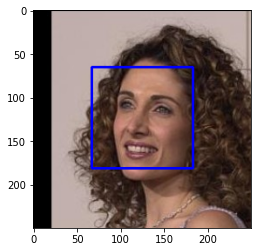

In [70]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/GoogleColab/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- 94% of the files in the human_files_short folder gets identified as human.
- 12% of the files in the dog_files_short folder gets identified as human.

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

successfully_identified_humans = 0
successfully_identified_humans_in_dog_files = 0

for i in tqdm(range(len(human_files_short))):
    img_path = human_files_short[i]
    if face_detector(img_path)>0:
        successfully_identified_humans += 1
print('Successfully identified humans: {}%'.format(successfully_identified_humans/len(human_files_short)*100))

for i in tqdm(range(len(dog_files_short))):
    img_path = dog_files_short[i]
    if face_detector(img_path)>0:
        successfully_identified_humans_in_dog_files += 1
print('Successfully identified humans in dog files: {}%'.format(successfully_identified_humans_in_dog_files/len(dog_files_short)*100)) 

  0%|          | 0/100 [00:00<?, ?it/s]

Successfully identified humans: 94.0%


100%|██████████| 100/100 [00:41<00:00,  2.40it/s]

Successfully identified humans in dog files: 12.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load in the image
    img = Image.open(img_path)
    
    # Pre-process image by re-sizing to 224x224 pixels, convert it into a tensor, normalise it
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
    # Apply transforms to image
    img_to_tensor = img_transform(img)
    
    # Convert image to an array
    img = np.array(img_to_tensor)
    
    # Convert back to a tensor float
    img_tensor = torch.from_numpy(img).type(torch.FloatTensor)

    # Insert 1 in position 0 for batch size=1 and ensure that it is a float tensor
    img_to_model = img_tensor.unsqueeze_(0).type(torch.FloatTensor)
    
    #we don't need to update the weights of our model so turn it off
    with torch.no_grad():
        if use_cuda:
            img_to_model = img_to_model.cuda()
        output = VGG16.forward(img_to_model)
        ps = torch.exp(output) #probabilities
        ps = ps.cpu() # need to put tensor into cpu here else it won't work when CUDA is available
        
        #designate top 1, make a list of probabilities and classes
        max_probs, max_classes = ps.topk(1) #identify top 1 probabilities and classes
        max_probs = max_probs.detach().numpy().tolist()[0] #make a list of only probabilities
        max_classes = max_classes.detach().numpy().tolist()[0] #make a list of only classes
    
    return max_classes # predicted class index

In [0]:
# Test VGG_predict function
VGG16_predict(dog_files[396])

[201]

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    # Get the list output from our VGG16_predict function
    img_class = VGG16_predict(img_path)
    # need to put tensor into cpu here else it won't work when CUDA is available
    #img_class = img_class.cpu()
    # Convert the list output to a numpy array
    img_class = np.array(img_class, dtype=np.int32)
    if (151<= img_class <= 268):
        result = 1 # 1 signifies 'True'
    else:
        result = 0 # 0 signifies 'False'
    return result # true/false

In [0]:
# Test dog_detector function
print(dog_detector(dog_files[161]))
print(dog_detector(human_files[1098]))

1
0


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- 1.0 % of images in human_files_short have detected a dog.
- 96.0 % of images in dog_files_short have detected a dog.

In [0]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

count_dogs_in_human_files = 0

for i in tqdm(range(len(human_files_short))):
    img_path = human_files_short[i]
    if (dog_detector(img_path) == 1):
        count_dogs_in_human_files += 1
        
print('{} % of images in human_files_short have detected a dog.'.format(count_dogs_in_human_files/len(human_files_short)*100))

100%|██████████| 100/100 [00:58<00:00,  1.72it/s]

1.0 % of images in human_files_short have detected a dog.


In [0]:
count_dogs_in_dog_files = 0

for i in tqdm(range(len(dog_files_short))):
    img_path = dog_files_short[i]
    if (dog_detector(img_path) == 1):
        count_dogs_in_dog_files += 1
        
print('{} % of images in dog_files_short have detected a dog.'.format(count_dogs_in_dog_files/len(dog_files_short)*100))

100%|██████████| 100/100 [00:59<00:00,  1.69it/s]

96.0 % of images in dog_files_short have detected a dog.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import torch
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Specify directories

train_dir = '/content/data/dogImages/train'
valid_dir = '/content/data/dogImages/valid'
test_dir = '/content/data/dogImages/test'

batch_size = 32

transform_train = transforms.Compose([
                  transforms.Resize((256,256)),
                  transforms.CenterCrop(224),
                  transforms.RandomHorizontalFlip(),
                  transforms.RandomRotation(10),
                  transforms.ToTensor(),
                  transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])

transform_other = transforms.Compose([
                  transforms.Resize((224,224)),
                  transforms.ToTensor()])

train_dataset = datasets.ImageFolder(root = train_dir, transform = transform_train)
valid_dataset = datasets.ImageFolder(root = valid_dir, transform = transform_train)
test_dataset = datasets.ImageFolder(root = test_dir, transform = transform_train)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

loaders_scratch = {'train': trainloader,
                   'valid': validloader,
                   'test': testloader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
- Although I don't need to resize the images to 224x224 pixels seeing that I will be creating a neural network from scratch, I have decided to resize them now to 224x224 pixels seeing that the PyTorch documentation recommends an image size of 224x224 pixels for a VGG16 pre-trained model.  Later on when using transfer learning, I can just apply the same transforms specified here, so it makes sense to apply these sizes now.  The resize transformation I have specified, actually crops the current images from the centre to a width and height of 224 pixels. The final image tensor will therefore be of dimensions 224 x 224 x 3 (width = 224 pixels, height = 224 pixels, depth = 3 color channels).
- Yes, I decided to augment the dataset by applying a horizontal flip and a rotation of 30 degrees to the images. I also normalise the datasets so that the RGB values will be in a range between zero and one.  This will make the neural network train better as these augmentations will add to the diversity of the dataset and hopefully will help my neural network perform better.

In [0]:
torch.cuda.empty_cache() 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [44]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Convolutional Layer 1: Layer is intended for detailed feature extraction
        self.conv1_1 = nn.Conv2d(3, 45, 3, padding=1)
        self.conv1_2 = nn.Conv2d(45, 45, 3, padding=1)
        self.conv1_3 = nn.Conv2d(45, 30, 3, padding=1)
        
        # Conv Layer 2: Layer is intended to extract further details
        self.conv2_1 = nn.Conv2d(30, 10, 3, padding=1)
        self.conv2_2 = nn.Conv2d(10, 10, 3, padding=1)
        self.conv2_3 = nn.Conv2d(10, 5, 3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Linear layers (FCL)
        self.fc1 = nn.Linear(5 * 56 * 56, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 133)
        
        # Dropout layers
        self.dropout = nn.Dropout(p=0.4)
    
    def forward(self, x):
        # Conv layer 1
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.relu(self.conv1_3(x))
        
        # Downsize image x and y dimensions
        x = self.pool(x)
        
        # Conv Layer 2
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.relu(self.conv2_3(x))  
        
        # Downsize image x and y dimensions
        x = self.pool(x)

        # Flatten input image
        x = x.view(-1, 5 * 56 * 56)
        
        # Use dropout
        x = self.dropout(x)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        # Use dropout
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        # Use dropout
        x = self.dropout(x)
        
        return self.fc3(x)
        
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1_1): Conv2d(3, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(45, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_3): Conv2d(45, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(30, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_3): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=15680, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=133, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- I've decided to use three convolutional layers with the Relu activation function, followed by a max pooling layer and dropout layer.  Also included in the architecture, are two hidden and fully connected layers.
- Each convolutional layer will have a kernel size of three (or a filter size of 3x3), a stride of one pixel and a padding of 1 pixel.  The padding will help us not to lose so much pixel information of the input images. A Relu activation function will also be applied to each layer to ensure that the values lies between zero and one.
- The first convolutional layer, `self.conv1`, will have an input image depth of 3 because the images in the dataset have 3 colour channels (RGB), and will output a depth of 16 which can be thought of as 16 stacked feature maps.  The goal of `self.conv1` is to identify certain features or patterns in the input image.  By creating an output depth off 16, the next convolutional layer, `self.conv2`, will then be able to use 16 feature images to try and identify patterns from the output of self.conv1.
- The input depth to the second convolutional layer, `self.conv2`, will be 16 and this layer will produce an output depth of 32 by analysing the patterns/ features from `self.conv1` (the first convolutional layer).  By increasing the depth of each consecutive convolutional layer, it allows the network to identify more patterns/ features so as to make an accurate prediction at the end.
- The input to the third and final convolutional layer, `self.conv3`, will be 32 and this layer will produce an output depth of 64 by analysing the patterns/ features from `self.conv2` (the second convolutional layer).  This final depth of 64 is the depth of the initial input image (remember that the depth started at 3) that will be passed to the hidden fully connected layers.
- As can be seen from the above descriptions of convolutional layers, it becomes clear that convolutional layers amplify the dimensions of the image by creating additional nodes in the network.  This can cause the network to become very large very quickly. We are more interested in the increased depth of the images, so we can downsize the x and y dimensions (the height and the width) of the images by applying a max pooling layer,`self.maxpool`, after  each convolutional layer.  The max pooling layer in this architecture is defined as having a kernel size/ filter size of 2x2 pixels and a stride of 2 (a stride of two means that the kernel will move up two pixels at a time).  What the max pooling layer with these parameters will do is to half the x and y dimensions of what they were in the previous layer by removing some pixels for example a plain background that contains no details/ features. In the architecture defined above, our input images are augmented to the dimensions of 224x224 pixels. After the first max pooling layer, the height and width of the image (the x and y dimensions) gets decreased by the inverse of the kernel size we specified in the max pooling layer i.e 2^(-1) or divided by two. The x and y dimensions of the input image to the second convolutional layer, `self.conv2`, is therefore 112x112 pixels.  In the same manner, after the second max pooling layer, the x and y dimensions of the input image to the third convolutional layer, `self.conv3`, is therefore 56x56 pixels. Finally, the output x and y dimensions of the third max pooling layer will be 28x28 pixels, and therefore the dimensions of the image passed into the fully connected layers will be a depth of 64, a height of 28 pixels and a width of 28 pixels.
- When the input image has finished moving through the three convolutional and max pooling layers, we first meed to convert the image tensor into a feature vector before it can be fed into the fully connected layers. This can be seen in the forward function under the comment `# Flatten input image`. Our input image is now a vector with one row and (64x28x28) columns, or one column with (64x28x28) columns (it depends how you want to look at it).
- In the architecture above, we also defined a dropout layer with a parameter of 25%. In order to prevent our network from overfitting, we apply a dropout layer to the input image before feeding the result into the first and second hidden fully connected layers as indicated in the forward function. The dropout layer will randomly turn off 25% of the nodes in the newly flattened feature vector before it goes into `self.fc1`, and the will also randomly turn off 25% of the nodes of the output of `self.fc1` before feeding it into `self.fc2`.  These dropout layers will help the network to generalise better on data that it was not trained on, therby giving us a more accurate prediction at the end.
- The number of input nodes to `self.fc1` will therefore be 64x28x28 and the number of output nodes it will produce is 500.
- The number of input nodes to `self.fc2` will therefore be 500 and the number of output nodes it will produce is 133 becasue there are 133 dog breeds in our dataset.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.025, momentum=0.65)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [46]:
# Load large images, prevent truncated image error
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ###################### 
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
              # move to GPU
              if use_cuda:
                    data, target = data.cuda(), target.cuda()
              ## update the average validation loss
      
              # forward pass: compute predicted outputs by passing inputs to the model
              output = model.forward(data)
              # calculate the batch loss
                loss = criterion(output, target)
              # update validation loss
              valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # Save model if validation loss has decreased since last min
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                                    criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.887128 	Validation Loss: 4.883762
Validation loss decreased (inf --> 4.883762).  Saving model ...
Epoch: 2 	Training Loss: 4.879704 	Validation Loss: 4.881569
Validation loss decreased (4.883762 --> 4.881569).  Saving model ...
Epoch: 3 	Training Loss: 4.873047 	Validation Loss: 4.881123
Validation loss decreased (4.881569 --> 4.881123).  Saving model ...
Epoch: 4 	Training Loss: 4.869243 	Validation Loss: 4.874406
Validation loss decreased (4.881123 --> 4.874406).  Saving model ...
Epoch: 5 	Training Loss: 4.832579 	Validation Loss: 4.769842
Validation loss decreased (4.874406 --> 4.769842).  Saving model ...
Epoch: 6 	Training Loss: 4.707578 	Validation Loss: 4.658702
Validation loss decreased (4.769842 --> 4.658702).  Saving model ...
Epoch: 7 	Training Loss: 4.616052 	Validation Loss: 4.609396
Validation loss decreased (4.658702 --> 4.609396).  Saving model ...
Epoch: 8 	Training Loss: 4.544240 	Validation Loss: 4.520422
Validation loss decreased (4.60939

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [47]:
def test(loaders, model, criterion, use_cuda):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders_scratch['test']):
          # move to GPU
          if use_cuda:
                data, target = data.cuda(), target.cuda()
          # forward pass: compute predicted outputs by passing inputs to the model
          output = model(data)
          # calculate the loss
          loss = criterion(output, target)
          # update average test loss 
          test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
          # convert output probabilities to predicted class
          pred = output.data.max(1, keepdim=True)[1]
          # compare predictions to true label
          correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
            100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.875061


Test Accuracy: 11% (95/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
## TODO: Specify data loaders

import os
import torch
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Specify directories

train_dir = '/content/drive/My Drive/GoogleColab/dogImages/train'
valid_dir = '/content/drive/My Drive/GoogleColab/dogImages/valid'
test_dir = '/content/drive/My Drive/GoogleColab/dogImages/test'

batch_size = 32

transform_train = transforms.Compose([
                  transforms.Resize((256,256)),
                  transforms.CenterCrop(224),
                  transforms.RandomHorizontalFlip(),
                  transforms.RandomRotation(10),
                  transforms.ToTensor(),
                  transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])

transform_other = transforms.Compose([
                  transforms.Resize((224,224)),
                  transforms.ToTensor()])

trainset = datasets.ImageFolder(train_dir, transform = transform_train)
validset = datasets.ImageFolder(valid_dir, transform = transform_train)
testset = datasets.ImageFolder(test_dir, transform = transform_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
validloader = torch.utils.data.DataLoader(validset, batch_size = batch_size, shuffle = False)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False)

loaders_transfer = {'train': trainloader,
           'valid': validloader,
           'test': testloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [12]:
## TODO: Specify model architecture 
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)

print(model_transfer)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [13]:
from collections import OrderedDict

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(n_inputs, 133)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
from torch import optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.0025, momentum = 0.5)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [15]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ###################### 
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
    
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # Save model if validation loss has decreased since last min
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

with torch.enable_grad():
    model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, 
                        criterion_transfer, use_cuda, 'model_transfer.pth')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pth'))

Epoch: 1 	Training Loss: 2.670344 	Validation Loss: 1.032730
Validation loss decreased (inf --> 1.032730).  Saving model ...
Epoch: 2 	Training Loss: 1.010349 	Validation Loss: 0.753331
Validation loss decreased (1.032730 --> 0.753331).  Saving model ...
Epoch: 3 	Training Loss: 0.756518 	Validation Loss: 0.691123
Validation loss decreased (0.753331 --> 0.691123).  Saving model ...
Epoch: 4 	Training Loss: 0.649428 	Validation Loss: 0.587024
Validation loss decreased (0.691123 --> 0.587024).  Saving model ...
Epoch: 5 	Training Loss: 0.575427 	Validation Loss: 0.614803
Epoch: 6 	Training Loss: 0.496647 	Validation Loss: 0.600161
Epoch: 7 	Training Loss: 0.458464 	Validation Loss: 0.542984
Validation loss decreased (0.587024 --> 0.542984).  Saving model ...
Epoch: 8 	Training Loss: 0.436114 	Validation Loss: 0.524171
Validation loss decreased (0.542984 --> 0.524171).  Saving model ...
Epoch: 9 	Training Loss: 0.399923 	Validation Loss: 0.530759
Epoch: 10 	Training Loss: 0.373004 	Valida

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [16]:
def test(loaders, model, criterion, use_cuda):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders_transfer['test']):
          # move to GPU
          if use_cuda:
                data, target = data.cuda(), target.cuda()
          # forward pass: compute predicted outputs by passing inputs to the model
          output = model(data)
          # calculate the loss
          loss = criterion(output, target)
          # update average test loss 
          test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
          # convert output probabilities to predicted class
          pred = output.data.max(1, keepdim=True)[1]
          # compare predictions to true label
          correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
            100. * correct / total, correct, total))

# call test function    
test(loaders_transfer['test'], model_transfer, criterion_transfer, use_cuda)


Test Loss: 0.531930


Test Accuracy: 83% (698/836)


In [17]:
import os
names = []
# Extract the second part of the folder names
filenames = os.listdir('/content/data/dogImages/train')
print(filenames[:5])
print(len(filenames))


['117.Pekingese', '060.Dogue_de_bordeaux', '118.Pembroke_welsh_corgi', '020.Belgian_malinois', '035.Boykin_spaniel']
133


In [18]:
for filename in filenames:
    name = filename.split('.')[1]
    names.append(name)
print(names)
type(names)
len(names)

# convert the list to a dictionary
dogDict = { i : names[i] for i in range(0, len(names) ) }
print(dogDict)

['Pekingese', 'Dogue_de_bordeaux', 'Pembroke_welsh_corgi', 'Belgian_malinois', 'Boykin_spaniel', 'Greater_swiss_mountain_dog', 'Flat-coated_retriever', 'Borzoi', 'Pointer', 'Neapolitan_mastiff', 'Gordon_setter', 'Glen_of_imaal_terrier', 'Mastiff', 'Komondor', 'American_eskimo_dog', 'Cairn_terrier', 'Bluetick_coonhound', 'Otterhound', 'Entlebucher_mountain_dog', 'Basset_hound', 'Newfoundland', 'Smooth_fox_terrier', 'Chinese_crested', 'Norwegian_buhund', 'Border_terrier', 'Collie', 'Canaan_dog', 'Pomeranian', 'Norwegian_lundehund', 'Bullmastiff', 'American_water_spaniel', 'German_shorthaired_pointer', 'Norfolk_terrier', 'American_staffordshire_terrier', 'German_shepherd_dog', 'Finnish_spitz', 'Xoloitzcuintli', 'Bichon_frise', 'Great_pyrenees', 'American_foxhound', 'Labrador_retriever', 'Tibetan_mastiff', 'Cocker_spaniel', 'Beauceron', 'Irish_setter', 'Briard', 'Australian_terrier', 'Black_russian_terrier', 'Boston_terrier', 'Anatolian_shepherd_dog', 'Clumber_spaniel', 'Great_dane', 'Bull

In [55]:
model_transfer.class_to_idx =trainset.class_to_idx

cat_index = model_transfer.class_to_idx

print(trainset.class_to_idx)

{'001.Affenpinscher': 0, '002.Afghan_hound': 1, '003.Airedale_terrier': 2, '004.Akita': 3, '005.Alaskan_malamute': 4, '006.American_eskimo_dog': 5, '007.American_foxhound': 6, '008.American_staffordshire_terrier': 7, '009.American_water_spaniel': 8, '010.Anatolian_shepherd_dog': 9, '011.Australian_cattle_dog': 10, '012.Australian_shepherd': 11, '013.Australian_terrier': 12, '014.Basenji': 13, '015.Basset_hound': 14, '016.Beagle': 15, '017.Bearded_collie': 16, '018.Beauceron': 17, '019.Bedlington_terrier': 18, '020.Belgian_malinois': 19, '021.Belgian_sheepdog': 20, '022.Belgian_tervuren': 21, '023.Bernese_mountain_dog': 22, '024.Bichon_frise': 23, '025.Black_and_tan_coonhound': 24, '026.Black_russian_terrier': 25, '027.Bloodhound': 26, '028.Bluetick_coonhound': 27, '029.Border_collie': 28, '030.Border_terrier': 29, '031.Borzoi': 30, '032.Boston_terrier': 31, '033.Bouvier_des_flandres': 32, '034.Boxer': 33, '035.Boykin_spaniel': 34, '036.Briard': 35, '037.Brittany': 36, '038.Brussels_gri

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in dogDict['train'].classes]
from PIL import Image

def predict_breed_transfer(img_path):
    
    model_transfer.eval()

    # Load in the image
    img = Image.open(img_path)
    
    # Pre-process image by re-sizing to 224x224 pixels, convert it into a tensor, normalise it
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
    # Apply transforms to image
    img_to_tensor = img_transform(img)
    
    # Convert image to an array
    img = np.array(img_to_tensor)
    
    # Convert back to a tensor float
    img_tensor = torch.from_numpy(img).type(torch.FloatTensor)

    # Insert 1 in position 0 for batch size=1 and ensure that it is a float tensor
    img_to_model = img_tensor.unsqueeze_(0).type(torch.FloatTensor)
    
    #we don't need to update the weights of our model so turn it off
    with torch.no_grad():
        if use_cuda:
            img_to_model = img_to_model.cuda()
        output = model_transfer.forward(img_to_model)
        ps = torch.exp(output) #probabilities
        ps = ps.cpu() # need to put tensor into cpu here else it won't work when CUDA is available
        
        #designate top 1, make a list of probabilities and classes
        max_probs, max_label = torch.topk(ps, 1) #identify top 1 probabilities and classes
        max_probs = max_probs.detach().numpy().tolist()[0] #make a list of only probabilities
        max_label = max_label.detach().numpy()[0] #make a list of only labels
        max_label = np.int(max_label)
        #identify breed
        for key,value in dogDict.items():
            if key == max_label:
                dog_name = value

    model_transfer.train()  #reactivate model's dropout

    return dog_name, max_label

In [111]:
# Test predict_breed_transfer function
print(predict_breed_transfer(dog_files[2367]))

('Greater_swiss_mountain_dog', 5)


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    label = predict_breed_transfer(img_path)[1]
    if face_detector(img_path):
        result = 'False'
    elif (-1<label<134):
        result = 'True'
    return result

In [116]:
# test
img1 = '/content/drive/My Drive/GoogleColab/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg'
print(dog_detector(img1))

img2 = '/content/drive/My Drive/GoogleColab/my_images/me.jpg'
print(dog_detector(img2))

True
False


In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.


def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # display the image, along with bounding box
    import matplotlib.pyplot as plt                        
%matplotlib inline  

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # display the image, along with bounding box
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    if dog_detector(img_path) == 'False' and face_detector(img_path)>0:
        dogName = predict_breed_transfer(img_path)[0]
        print('This human looks like a {}'.format(dogName))
    elif dog_detector(img_path) == 'True':
        print('This dog looks like a {}'.format(predict_breed_transfer(img_path)[0]))
    elif dog_detector(img_path) == 'False' and face_detector(img_path)< 1:
        print('No humans or dogs were detected in the image.')

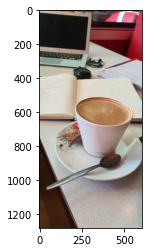

This dog looks like a Irish_terrier


In [146]:
# test
img = '/content/drive/My Drive/GoogleColab/my_images/IMG-20200429-WA0003.jpg'
run_app(img)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

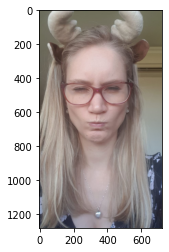

This human looks like a Boston_terrier


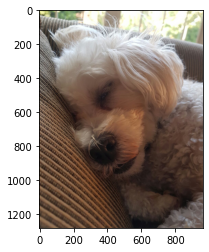

This dog looks like a Havanese


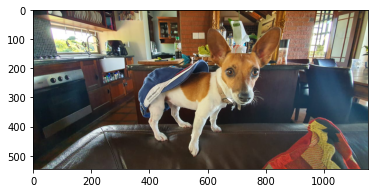

This dog looks like a Komondor


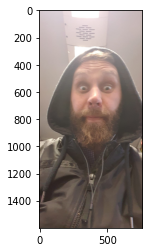

This human looks like a Brussels_griffon


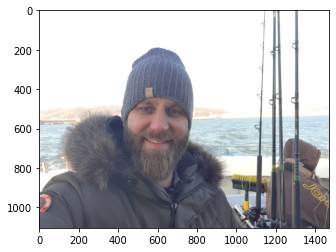

This human looks like a Brussels_griffon


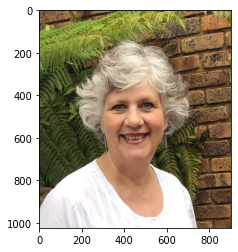

This human looks like a Boston_terrier


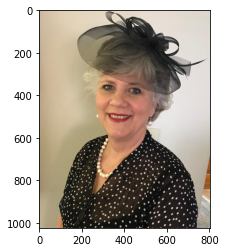

This human looks like a Poodle


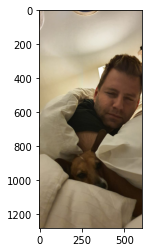

This dog looks like a Irish_terrier


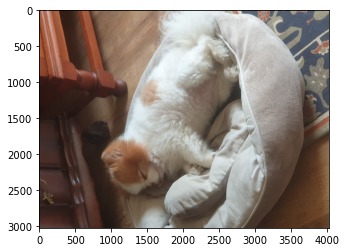

This dog looks like a Manchester_terrier


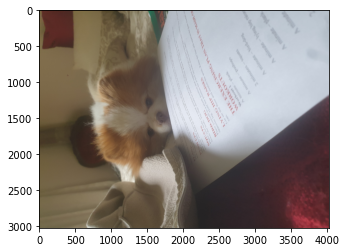

This dog looks like a Lhasa_apso


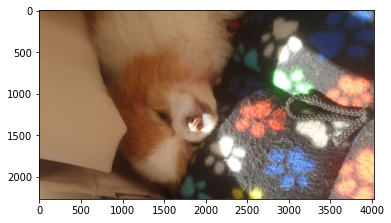

This human looks like a Manchester_terrier


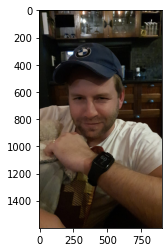

This human looks like a Australian_terrier


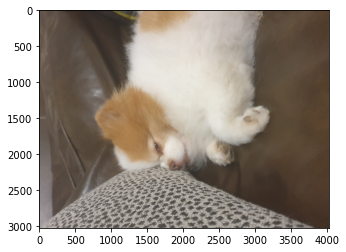

This dog looks like a Manchester_terrier


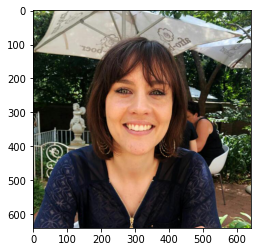

This human looks like a German_wirehaired_pointer


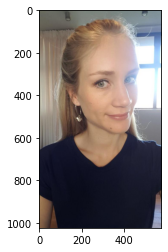

This human looks like a Irish_terrier


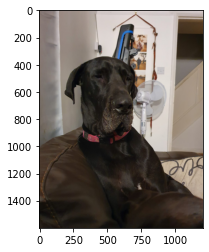

This human looks like a Belgian_tervuren


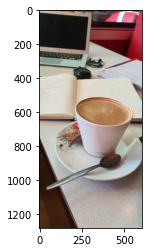

This dog looks like a Welsh_springer_spaniel


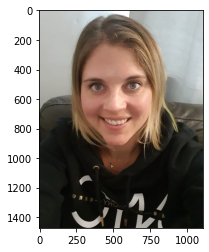

This human looks like a German_wirehaired_pointer


In [151]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
image_files = np.array(glob( "/content/drive/My Drive/GoogleColab/my_images/*"))

## suggested code, below
for file in np.hstack(image_files):
    run_app(file)